In [9]:
import pandas as pd

# Load the dataset
file_path = 'dataset/comments.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
dataset.head(), dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   no       1000 non-null   int64 
 1   comment  990 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


(   no                                            comment
 0   1  Aku cuma pake sunscreen dan krim ini doang, al...
 1   2  Simpen dulu di keranjang kuning, nanti check out.
 2   3  Muka kusamku jadi segeran setelah rutin pake k...
 3   4  Aku cuma pake sunscreen dan krim ini doang, al...
 4   5  Masih menjadi misteri kenapa Dr. Fay bisa seba...,
 None)

In [10]:
# Cek distribusi panjang komentar
dataset['comment_length'] = dataset['comment'].str.len()
print("\n📏 Distribusi Panjang Komentar:")
print(dataset['comment_length'].describe())


📏 Distribusi Panjang Komentar:
count    990.000000
mean      67.741414
std       26.298239
min       27.000000
25%       49.000000
50%       64.000000
75%       80.000000
max      144.000000
Name: comment_length, dtype: float64


In [11]:
# Cek ringkasan statistik dataset
print(dataset.describe())

                no  comment_length
count  1000.000000      990.000000
mean    500.500000       67.741414
std     288.819436       26.298239
min       1.000000       27.000000
25%     250.750000       49.000000
50%     500.500000       64.000000
75%     750.250000       80.000000
max    1000.000000      144.000000


In [12]:
# Cek jumlah nilai yang hilang
print(dataset.isnull().sum())


no                 0
comment           10
comment_length    10
dtype: int64


In [14]:
# Cek jumlah duplikasi
print(dataset.duplicated().sum())

0


In [15]:
# Menghapus kolom yang tidak perlu
dataset.drop(columns=['no'], inplace=True)

In [16]:
print("\n❓ Jumlah Missing Values:")
print(dataset.isnull().sum())

# # Visualisasi missing values
# import seaborn as sns
# sns.heatmap(dataset.isnull(), cbar=False)


❓ Jumlah Missing Values:
comment           10
comment_length    10
dtype: int64


In [17]:
print("\n♻️ Jumlah Duplikat:", dataset.duplicated(subset=['comment']).sum())


♻️ Jumlah Duplikat: 946


In [20]:
# Hapus baris dengan komentar null (10 data)
cleaned_data = dataset.dropna(subset=['comment'])

# Alternatif: Isi dengan placeholder
# cleaned_data['comment'] = dataset['comment'].fillna('[KOSONG]')

In [21]:
# Case folding
cleaned_data['cleaned_comment'] = cleaned_data['comment'].str.lower()

# Remove special characters (sesuaikan dengan kebutuhan)
cleaned_data['cleaned_comment'] = cleaned_data['cleaned_comment'].str.replace(
    r'[^\w\s]', '', regex=True
)

# Remove extra whitespace
cleaned_data['cleaned_comment'] = cleaned_data['cleaned_comment'].str.strip()

C:\Users\rfahr\AppData\Local\Temp\ipykernel_25340\1740083165.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['cleaned_comment'] = cleaned_data['comment'].str.lower()
C:\Users\rfahr\AppData\Local\Temp\ipykernel_25340\1740083165.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_data['cleaned_comment'] = cleaned_data['cleaned_comment'].str.replace(
C:\Users\rfahr\AppData\Local\Temp\ipykernel_25340\1740083165.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a s

In [22]:
cleaned_data = cleaned_data.drop_duplicates(subset=['comment'], keep='first')

In [23]:
print("✅ Shape setelah cleaning:", cleaned_data.shape)
print("✅ Jumlah Missing Values baru:", cleaned_data.isnull().sum())
print("\n📝 Contoh Data Bersih:")
print(cleaned_data[['cleaned_comment']].head(3))

✅ Shape setelah cleaning: (53, 3)
✅ Jumlah Missing Values baru: comment            0
comment_length     0
cleaned_comment    0
dtype: int64

📝 Contoh Data Bersih:
                                     cleaned_comment
0  aku cuma pake sunscreen dan krim ini doang alh...
1    simpen dulu di keranjang kuning nanti check out
2  muka kusamku jadi segeran setelah rutin pake k...


(np.float64(-0.5), np.float64(399.5), np.float64(199.5), np.float64(-0.5))

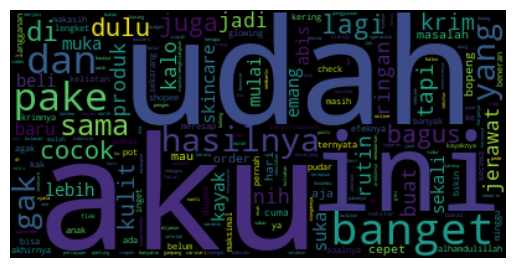

In [24]:
from wordcloud import WordCloud
import matplotlib.pyplot as plt

text = ' '.join(cleaned_data['cleaned_comment'])
wordcloud = WordCloud().generate(text)
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")

In [25]:
from textblob import TextBlob
cleaned_data['sentiment'] = cleaned_data['cleaned_comment'].apply(
    lambda x: TextBlob(x).sentiment.polarity
)

In [26]:
cleaned_data.to_csv('cleaned_comments.csv', index=False)

### Give Label to Comment

In [220]:
# Contoh dataframe untuk labeling manual
label_sample = cleaned_data.sample(10, random_state=42)[['cleaned_comment']]
print("📋 Contoh Data untuk Labeling Manual:")
print(label_sample)

📋 Contoh Data untuk Labeling Manual:
                                       cleaned_comment
22                  pakenya gampang cepet meresap lagi
73     cocok untuk berbagai kalangan dan masalah kulit
137  aku juga pake dan cocok kalo jerawat 2 hari aj...
15      ini dia yang aku caricari akhirnya ketemu juga
87   dikira bakal lengket di kulit eh pas dipake te...
6    udah check out kak yang kemarin udah abis dan ...
20            baunya juga enak gak nyengat sama sekali
154                 ini beneran aku udah nyoba sendiri
4    masih menjadi misteri kenapa dr fay bisa sebag...
52   pokoknya bintang lima deh buat produk ini luv ...


In [221]:
# Menggunakan kamus kata positif/negatif Indonesia
positive_words = ['bagus', 'mantap', 'luar biasa', 'keren', 'puas', 'suka', 'hebat', 'menyenangkan', 'terbaik', 'cinta','alhamdulillah', 'syukur', 'senang', 'puas', 'puji', 'pujian', 'puji-pujian']
negative_words = ['jelek', 'mahal', 'rugi', 'kecewa', 'redam']


def rule_based_sentiment(text):
    text = text.lower().strip()  # Ubah ke lowercase dan hapus spasi ekstra
    positive = sum(word in text for word in positive_words)
    negative = sum(word in text for word in negative_words)
    
    if positive > negative:
        return 'positif'
    elif negative > positive:
        return 'negatif'
    else:
        return 'netral'
cleaned_data['sentiment_rule'] = cleaned_data['cleaned_comment'].apply(rule_based_sentiment)


In [226]:
cleaned_data.drop(columns=['sentiment_ai', 'final_sentiment'], inplace=True)

In [265]:
# Menggunakan model IndoBERT untuk sentiment analysis
from transformers import pipeline

# Load model Indonesian sentiment analysis
sentiment_analyzer = pipeline(
    "text-classification",
    model="indolem/indobert-base-uncased",
    tokenizer="indolem/indobert-base-uncased"
)

def predict_sentiment(text):
    result = sentiment_analyzer(text[:64])  # truncate jika terlalu panjang
    return result[0]['label']

cleaned_data['sentiment_ai'] = cleaned_data['cleaned_comment'].apply(predict_sentiment)

Some weights of BertForSequenceClassification were not initialized from the model checkpoint at indolem/indobert-base-uncased and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
Device set to use cpu


In [266]:
# Cek konsistensi antara rule-based dan AI
consistency_check = cleaned_data[
    cleaned_data['sentiment_rule'] != cleaned_data['sentiment_ai']
][['cleaned_comment', 'sentiment_rule', 'sentiment_ai']]

print("🔍 Contoh Ketidakonsistenan Label:")
print(consistency_check.head(3))

🔍 Contoh Ketidakonsistenan Label:
                                     cleaned_comment sentiment_rule  \
0  aku cuma pake sunscreen dan krim ini doang alh...        positif   
1    simpen dulu di keranjang kuning nanti check out         netral   
2  muka kusamku jadi segeran setelah rutin pake k...         netral   

  sentiment_ai  
0      LABEL_1  
1      LABEL_1  
2      LABEL_1  


In [267]:
# Contoh handling khusus untuk netral
cleaned_data['final_sentiment'] = cleaned_data['sentiment_ai'].replace({
    'LABEL_0': 'negatif',
    'LABEL_1': 'positif',
    'LABEL_2': 'netral'
})

In [268]:
cleaned_data.head()

,comment,comment_length,cleaned_comment,sentiment,sentiment_rule,sentiment_ai,final_sentiment
0,"Aku cuma pake sunscreen dan krim ini doang, al...",79.0,aku cuma pake sunscreen dan krim ini doang alh...,0.0,positif,LABEL_1,positif
1,"Simpen dulu di keranjang kuning, nanti check out.",49.0,simpen dulu di keranjang kuning nanti check out,0.0,netral,LABEL_1,positif
2,Muka kusamku jadi segeran setelah rutin pake k...,54.0,muka kusamku jadi segeran setelah rutin pake k...,0.0,netral,LABEL_1,positif
4,Masih menjadi misteri kenapa Dr. Fay bisa seba...,54.0,masih menjadi misteri kenapa dr fay bisa sebag...,0.0,positif,LABEL_0,negatif
5,"Banyakin produk kayak gini, aku anak kuliahan ...",86.0,banyakin produk kayak gini aku anak kuliahan y...,0.0,netral,LABEL_1,positif


In [269]:
print("🎯 Contoh Data Berlabel:")
print(cleaned_data[['cleaned_comment', 'final_sentiment']].head(50))

🎯 Contoh Data Berlabel:
                                       cleaned_comment final_sentiment
0    aku cuma pake sunscreen dan krim ini doang alh...         positif
1      simpen dulu di keranjang kuning nanti check out         positif
2    muka kusamku jadi segeran setelah rutin pake k...         positif
4    masih menjadi misteri kenapa dr fay bisa sebag...         negatif
5    banyakin produk kayak gini aku anak kuliahan y...         positif
6    udah check out kak yang kemarin udah abis dan ...         negatif
7    aku termasuk orang yang gak percayaan kalo bel...         positif
8    aku juga lagi pake alhamdulillah hasilnya udah...         positif
9                      hasilnya nyata dan bagus banget         positif
11                  di aku cocok banget makasih banyak         negatif
12   kak aku udah abis 3 pot nih udah jadi langgana...         positif
13   krimnya ringan gak lengket dan yang penting bi...         positif
15      ini dia yang aku caricari akhirnya ketemu jug

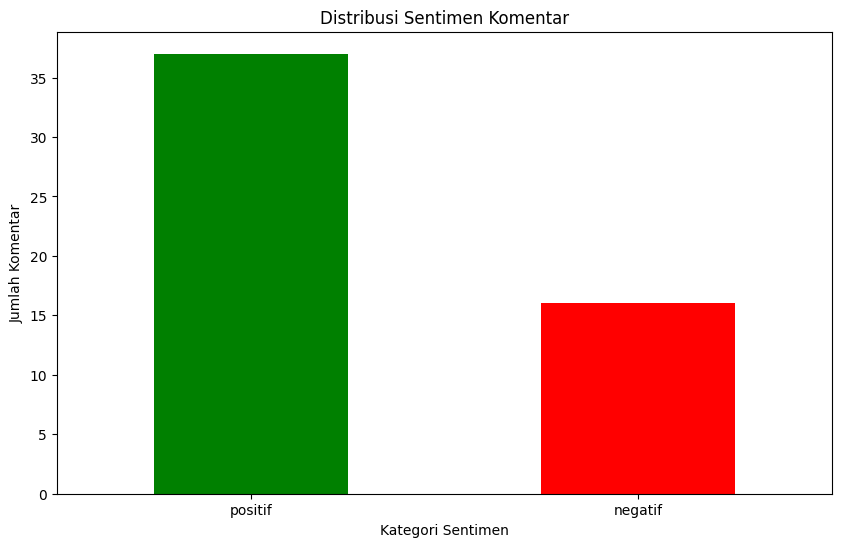

In [276]:
import matplotlib.pyplot as plt

# Visualisasi distribusi sentimen
sentiment_dist = cleaned_data['final_sentiment'].value_counts()

plt.figure(figsize=(10,6))
sentiment_dist.plot(kind='bar', color=['green', 'red', 'blue'])
plt.title('Distribusi Sentimen Komentar')
plt.xlabel('Kategori Sentimen')
plt.ylabel('Jumlah Komentar')
plt.xticks(rotation=0)
plt.show()

In [217]:
# del cleaned_data['sentiment_rule']
# cleaned_data['sentiment_rule'] = cleaned_data['cleaned_comment'].apply(rule_based_sentiment)

# del cleaned_data['final_sentiment']
# cleaned_data['final_sentiment'] = cleaned_data['cleaned_comment'].apply(rule_based_sentiment)

In [272]:
# 1. Mapping label AI ke string yang readable
label_mapping = {
    'LABEL_0': 'negatif',
    'LABEL_1': 'positif',
    'LABEL_2': 'netral'
}
cleaned_data['sentiment_ai_mapped'] = cleaned_data['sentiment_ai'].map(label_mapping)

# 2. Fungsi prioritas rule-based
def prioritize_rules(row):
    # Jika rule-based sudah positif/negatif, ambil rule-based
    if row['sentiment_rule'] in ['positif', 'negatif']:
        return row['sentiment_rule']
    # Jika rule-based netral, pakai AI
    else:
        return row['sentiment_ai_mapped']

# 3. Apply fungsi prioritas
cleaned_data['final_sentiment'] = cleaned_data.apply(prioritize_rules, axis=1)

# 4. Validasi kasus konflik
conflict_cases = cleaned_data[
    (cleaned_data['sentiment_rule'] != cleaned_data['sentiment_ai_mapped']) & 
    (cleaned_data['sentiment_rule'] != 'netral')
]

print("⚠️ Kasus Konflik Rule vs AI:")
print(conflict_cases[['comment', 'sentiment_rule', 'sentiment_ai_mapped', 'final_sentiment']])

⚠️ Kasus Konflik Rule vs AI:
                                               comment sentiment_rule  \
4    Masih menjadi misteri kenapa Dr. Fay bisa seba...        positif   
24   Aku saranin kalo mau hasilnya lebih bagus, pak...        positif   
46   Aku pernah order di Shopee, emang bagus nih krim.        positif   
67   Gak kecewa sama sekali beli ini, cuma pengirim...        negatif   
72        Teksturnya lembut dan ringan di kulit, suka!        positif   
147  Aku udah order di Shopee dulu, udah abis 2 cup...        positif   

    sentiment_ai_mapped final_sentiment  
4               negatif         positif  
24              negatif         positif  
46              negatif         positif  
67              positif         negatif  
72              negatif         positif  
147             negatif         positif  


In [277]:
cleaned_data.head(5)

,comment,comment_length,cleaned_comment,sentiment,sentiment_rule,sentiment_ai,final_sentiment,sentiment_ai_mapped
0,"Aku cuma pake sunscreen dan krim ini doang, al...",79.0,aku cuma pake sunscreen dan krim ini doang alh...,0.0,positif,LABEL_1,positif,positif
1,"Simpen dulu di keranjang kuning, nanti check out.",49.0,simpen dulu di keranjang kuning nanti check out,0.0,netral,LABEL_1,positif,positif
2,Muka kusamku jadi segeran setelah rutin pake k...,54.0,muka kusamku jadi segeran setelah rutin pake k...,0.0,netral,LABEL_1,positif,positif
4,Masih menjadi misteri kenapa Dr. Fay bisa seba...,54.0,masih menjadi misteri kenapa dr fay bisa sebag...,0.0,positif,LABEL_0,positif,negatif
5,"Banyakin produk kayak gini, aku anak kuliahan ...",86.0,banyakin produk kayak gini aku anak kuliahan y...,0.0,netral,LABEL_1,positif,positif


In [278]:
cleaned_data.to_csv('cleaned_comments1.csv', index=False)

In [279]:
# Tambahkan confidence score dari model AI
cleaned_data['ai_confidence'] = cleaned_data['sentiment_ai'].apply(
    lambda x: x['score'] if isinstance(x, dict) else 0.5
)

def enhanced_priority(row):
    # Jika rule-based sudah pasti & confidence AI < threshold
    if (row['sentiment_rule'] in ['positif', 'negatif']) and (row['ai_confidence'] < 0.7):
        return row['sentiment_rule']
    # Jika confidence AI tinggi, override rule-based
    elif row['ai_confidence'] >= 0.9:
        return row['sentiment_ai_mapped']
    else:
        return row['sentiment_rule']

cleaned_data['final_sentiment_v2'] = cleaned_data.apply(enhanced_priority, axis=1)

In [280]:
import pandas as pd

# Load the dataset
file_path = 'dataset/comments.csv'
dataset = pd.read_csv(file_path)

# Display the first few rows of the dataset to understand its structure
dataset.head(), dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 2 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   no       1000 non-null   int64 
 1   comment  990 non-null    object
dtypes: int64(1), object(1)
memory usage: 15.8+ KB


(   no                                            comment
 0   1  Aku cuma pake sunscreen dan krim ini doang, al...
 1   2  Simpen dulu di keranjang kuning, nanti check out.
 2   3  Muka kusamku jadi segeran setelah rutin pake k...
 3   4  Aku cuma pake sunscreen dan krim ini doang, al...
 4   5  Masih menjadi misteri kenapa Dr. Fay bisa seba...,
 None)

In [ ]:
# Cek distribusi panjang komentar
dataset['comment_length'] = dataset['comment'].str.len()
print("\n📏 Distribusi Panjang Komentar:")
print(dataset['comment_length'].describe())


📏 Distribusi Panjang Komentar:
count    990.000000
mean      67.741414
std       26.298239
min       27.000000
25%       49.000000
50%       64.000000
75%       80.000000
max      144.000000
Name: comment_length, dtype: float64


In [ ]:
# Cek ringkasan statistik dataset
print(dataset.describe())

       comment_length
count      990.000000
mean        67.741414
std         26.298239
min         27.000000
25%         49.000000
50%         64.000000
75%         80.000000
max        144.000000


In [ ]:
# Cek jumlah nilai yang hilang
print(dataset.isnull().sum())


no          0
comment    10
dtype: int64


In [ ]:
# Cek jumlah duplikasi
print(dataset.duplicated().sum())

946


In [ ]:
# Menghapus kolom yang tidak perlu
dataset.drop(columns=['no'], inplace=True)


📏 Distribusi Panjang Komentar:
count    990.000000
mean      67.741414
std       26.298239
min       27.000000
25%       49.000000
50%       64.000000
75%       80.000000
max      144.000000
Name: comment_length, dtype: float64


In [ ]:
print("\n❓ Jumlah Missing Values:")
print(dataset.isnull().sum())

# # Visualisasi missing values
# import seaborn as sns
# sns.heatmap(dataset.isnull(), cbar=False)


❓ Jumlah Missing Values:
comment           10
comment_length    10
dtype: int64


In [ ]:
print("\n♻️ Jumlah Duplikat:", dataset.duplicated(subset=['comment']).sum())


♻️ Jumlah Duplikat: 946
